# Aircraft Risk Analysis

## 1. Business Understanding

### Overview
This project seeks to analyze aviation accident data from the **National Transportation Safety Board** to identify the lowest-risk aircraft models and manufacturers.

### Problem Statement
Which aircraft are safest for our company to purchase as we expand into the aviation industry?

### Objectives
1. Assess historical aircraft accident trends (1962–2023).
2. Identify aircraft types and manufacturers with the lowest risks.
3. Provide actionable recommendations for executives.







## 2. Data Understanding
The dataset **Aviation_Data.csv** contains aviation accident records from 1962-2023 collected by the National Transportation Safety Board in the United States and international waters.

The code cell below contain code to inspect the data by first loading it to Pandas.

In [1]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# loading data to pandas dataframe
df = pd.read_csv('data/Aviation_Data.csv')

# Quick look into data
df.head()


c:\Users\ELITEBOOK\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [2]:
# checking dataset dimensionanality
df.shape

(90348, 31)

In [3]:
# checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## 3. Data preparation
From the data understanding above, we can clearly see that the data needs to be cleaned and prepared before analysis is done.

Under data preparation, we check and impute for the following:
- missing values
- duplicate records
- extraneous and erroneous data

####   1. Checking and handling of missing records

In [4]:
# checking for number of  missing values per column
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

From the above code cells, we can see the total number of missing or NaN values for each of the fields in the dataset. 

`Investigation.Type` is the only field with no missing values/NaN values

In this section, we shall handle the NaN values and  understand the criteria for the choice of handling them. 

**Columns/Fields to be completely dropped**

These columns do not contribute to assessing aircraft safety or are too incomplete
- Event.Id, Accident.Number, Registration.Number → Identifiers only, not useful for analysis
- Report.Status, Publication.Date → Metadata, does not affect risk.
- Latitude, Longitude → Too many missing values, not needed unless mapping.
- Airport.Code, Airport.Name → Too sparse and specific, not relevant to purchase decision.
- FAR.Description → Technical/regulatory info, too incomplete.
- Schedule, Air.carrier → Too many missing values, not essential for aircraft-level risk.

In [5]:
# dropping columns
df.drop(columns=['Event.Id', 'Accident.Number', 'Registration.Number', 'Report.Status', 'Publication.Date','Latitude', 'Longitude' , 'Airport.Code', 'Airport.Name' , 'FAR.Description','Schedule', 'Air.carrier'], inplace=True)

In [6]:
# checking to see the new number of columns after dropping fields
df.shape

(90348, 19)

**Columns/Fields to be Filled with 'Unknown'**

These fields are useful, but missing values don’t break the analysis. Using “Unknown” keeps the rows while acknowledging incomplete info.These are categorical data.
- Make, Model → Essential for aircraft risk; mark missing as “Unknown”.
- Aircraft.Category → Important for grouping by type (plane, helicopter, etc.).
- Engine.Type → Different engine types may have different risks.
- Injury.Severity, Aircraft.damage → Key outcomes, keep with “Unknown” if missing.
- Purpose.of.flight → Useful to compare private vs commercial accidents.
- Weather.Condition → Weather influences risk; “Unknown” is safer than dropping.
- Broad.phase.of.flight → Helps identify when accidents happen; missing filled as “Unknown”.
- Location, Country → Contextual info, but not critical enough to drop rows.

In [7]:
# Fill multiple columns with "Unknown"
df.fillna({
    "Make": "Unknown",
    "Model": "Unknown",
    "Aircraft.Category": "Unknown",
    "Engine.Type": "Unknown",
    "Injury.Severity": "Unknown",
    "Aircraft.damage": "Unknown",
    "Purpose.of.flight": "Unknown",
    "Weather.Condition": "Unknown",
    "Broad.phase.of.flight": "Unknown",
    "Location": "Unknown",
    "Country": "Unknown"
}, inplace=True)


**Columns/Fields to be Imputed**

These fields can be meaningfully imputed without distorting analysis.

- Number.of.Engines → Impute with median (most aircraft have 1–2 engines).

- Amateur.Built → Default to “No”, since most aircraft are not homebuilt.

- Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.   Uninjured → If missing, assume 0 (no injuries recorded).

In [8]:
# Imputing Number.of.Engines with median
df['Number.of.Engines'].fillna(df['Number.of.Engines'].median(), inplace=True)

# Imputing Amateur.Built with 'No'
df['Amateur.Built'].fillna('No', inplace=True)

# Imputing Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured with 0 (no injuries recorded)
df.fillna({
    "Total.Fatal.Injuries": 0,
    "Total.Serious.Injuries": 0,
    "Total.Minor.Injuries": 0,
    "Total.Uninjured": 0
}, inplace=True)



**Dropping of only missing values in Column Event.Date**

Because `Event.Date` has only got 69 missing values, we can afford to drop them but not the entire column because the column is required for time-based analysis.
 
Rows missing this field will be dropped.

In [9]:
# dropping just the NaN values from column Event.Date
df = df.dropna(subset=['Event.Date'])

All missing values in the data frame have been successfully handled.

We can see this by checking for missing values, see below

In [10]:
# checking for missing values
df.isna().sum() 

Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

####   2. Checking and handling of duplicated records

In [11]:
# checking for duplicates
df.duplicated().value_counts()

False    88854
True        35
dtype: int64

From the code above, it is clear that we have **35 duplicated records** in our data.
 
The code cell below, will handle the duplicates by removing them from the data 

In [12]:
# removing duplicates
df = df.drop_duplicates()

In [13]:
# check data dimensionality - 1390 records have been successfully removed thus, current number of rows is 88958
print(df.shape)

# checking for duplicates
df.duplicated().value_counts()

(88854, 19)


False    88854
dtype: int64

#### 3. Convert `Event.Date` to datetime & extract year

Dates are usually read as strings, but we want them as real datetime objects so we can group by year

Extracting the year lets you analyze accident trends over time




In [14]:
# convert Event.Date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Extract year into a new column
df['Year'] = df['Event.Date'].dt.year

In [15]:
# print to view cleaned Event.Date columm values and the  first 10 values of the newly created Year col
print(df['Event.Date'].head())
print(df['Year'].unique()[:10])

0   1948-10-24
1   1962-07-19
2   1974-08-30
3   1977-06-19
4   1979-08-02
Name: Event.Date, dtype: datetime64[ns]
[1948 1962 1974 1977 1979 1981 1982 1983 1984 1985]


#### 4. Standardize column names for easier analysis

Current columns like `Aircraft.damage` or `Total.Fatal.Injuries` have inconsistent casing, dots, and spaces.

Standardizing makes it easier to call them in code



In [17]:
# Standardize column names: lowercase + replace spaces/dots with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(r'[ .]', '_', regex=True)

print(df.columns.tolist())

['investigation_type', 'event_date', 'location', 'country', 'injury_severity', 'aircraft_damage', 'aircraft_category', 'make', 'model', 'amateur_built', 'number_of_engines', 'engine_type', 'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured', 'weather_condition', 'broad_phase_of_flight', 'year']


## 4. Data Analysis

Now that our data is prepared/cleaned, we can proceed to analysis.

The goal of the analysis is to determine which aircrafts are the lowest risk for the company to purchase.

Hence, we will focus on accident patterns by aircraft type, manufacturer, engine and severity.

#### 1. Safest Manufacturers (by fatalities per accident)

**Question :** Which aircraft manufacturers (makes) have the lowest risk based on accident history?

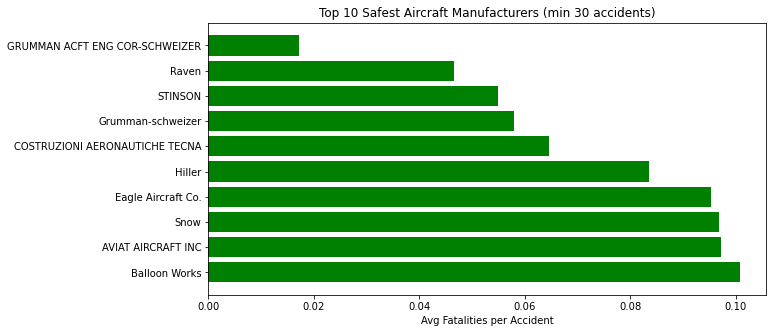

In [51]:
# Group by manufacturer (make) and compute safety metrics
group = df.groupby('make').agg(
    accident_count=('make','size'),
    total_fatalities=('total_fatal_injuries','sum'),
    accidents_with_fatalities=('total_fatal_injuries', lambda x: (x > 0).sum())
).reset_index()

# Derived metrics
group['fatalities_per_accident'] = group['total_fatalities'] / group['accident_count']
group['pct_accidents_with_fatalities'] = group['accidents_with_fatalities'] / group['accident_count']

# Filter by minimum number of accidents to ensure reliability
min_accidents = 30
group_filtered = group[group['accident_count'] >= min_accidents].sort_values('fatalities_per_accident')

# Plot top 10 safest makes
top_n = 10
safest = group_filtered.head(top_n)

fig, ax = plt.subplots(figsize=(10,5))
ax.barh(safest['make'], safest['fatalities_per_accident'], color="green")
ax.set_xlabel('Avg Fatalities per Accident')
ax.set_title(f'Top {top_n} Safest Aircraft Manufacturers (min {min_accidents} accidents)')
plt.gca().invert_yaxis()
plt.show()

**Chart Interpretaion :** 

- The bar chart shows the top 10 safest aircraft manufacturers ranked by average fatalities per accident (with a minimum of 30 recorded accidents to ensure reliability).

- Among these, GRUMMAN ACFT ENG COR-SCHWEIZER emerges as the safest manufacturer, recording the lowest average fatalities per accident.

- Other manufacturers like Raven, STINSON, Grumman-Schweizer, COSTRUZIONI AERONAUTICHE TECNA, and Hiller also perform strongly, maintaining relatively low accident severity.

- At the higher end of the group, Balloon Works shows the highest average fatalities per accident among this “safest” set , but it is still safer than many manufacturers not included in the top 10.


**Answer :**

The analysis indicates that **GRUMMAN ACFT ENG COR-SCHWEIZER, Raven, and STINSON are historically the safest manufacturers, with consistently low accident severity.**

 For the company’s expansion strategy, these makes represent low-risk options for initial aircraft purchases. 
 
 On the other hand, manufacturers like Balloon Works, while still relatively safe compared to the wider market, show higher severity and may carry slightly greater operational risk.

#### 2. Safest Aircraft Models by Accident Severity

**Question :** Which aircraft models have historically shown the lowest accident severity?

<ipython-input-58-524aea90a242>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_filtered['fatality_rate'] = model_filtered['fatal_accidents'] / model_filtered['accident_count']


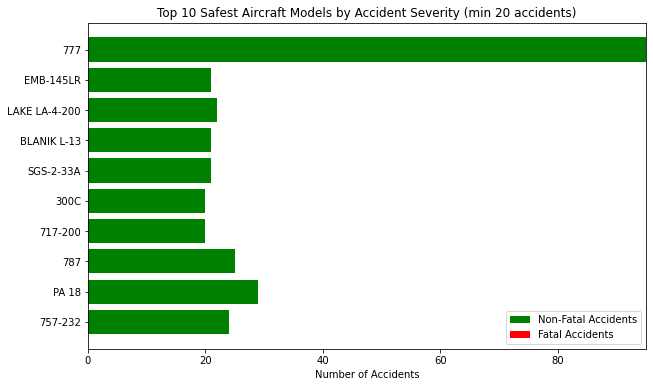

In [58]:
# Group by model
model_group = df.groupby('model').agg(
    accident_count=('model','size'),
    fatal_accidents=('total_fatal_injuries', lambda x: (x > 0).sum())
).reset_index()

# Add non-fatal accidents
model_group['non_fatal_accidents'] = model_group['accident_count'] - model_group['fatal_accidents']

# Filter for reliability (only models with at least 20 accidents)
min_accidents_model = 20
model_filtered = model_group[model_group['accident_count'] >= min_accidents_model]

# Sort by fatal accident share
model_filtered['fatality_rate'] = model_filtered['fatal_accidents'] / model_filtered['accident_count']
safest_models = model_filtered.sort_values('fatality_rate').head(10)

# Plot stacked bar (fatal vs non-fatal accidents)
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(safest_models['model'], safest_models['non_fatal_accidents'], label='Non-Fatal Accidents', color='green')
ax.barh(safest_models['model'], safest_models['fatal_accidents'], 
        left=safest_models['non_fatal_accidents'], label='Fatal Accidents', color='red')

ax.set_xlabel("Number of Accidents")
ax.set_title(f"Top 10 Safest Aircraft Models by Accident Severity (min {min_accidents_model} accidents)")
ax.legend()
plt.gca().invert_yaxis()
plt.show()




**Chart Interpretaion :** 

- All top 10 models in the chart show almost entirely green bars (non-fatal accidents) with negligible or no red segments (fatal accidents).

- The Boeing 777 stands out with the highest number of reported accidents among this group — yet none of them are fatal, making it an exceptionally safe commercial aircraft.

- Similarly, models like the EMB-145LR, PA-18, and 757-232 also report multiple accidents but consistently non-fatal outcomes.

- Training and light aircraft (e.g., BLANIK L-13, SGS-2-33A) also appear in this list, showing that despite frequent usage, their incidents rarely result in fatalities.

**Answer :**

The analysis shows that the Boeing 777, EMB-145LR, and Boeing 757-232 stand out as the safest aircraft models, with zero recorded fatal accidents despite multiple incidents.

This indicates that these aircraft have strong safety performance and are low-risk candidates for the company to consider purchasing for both commercial and private operations.

#### 3. Accident Risk: Commercial vs Private

**Question :** Which type of flights, commercial or private, carry lower overall risk when considering both accident frequency and severity?

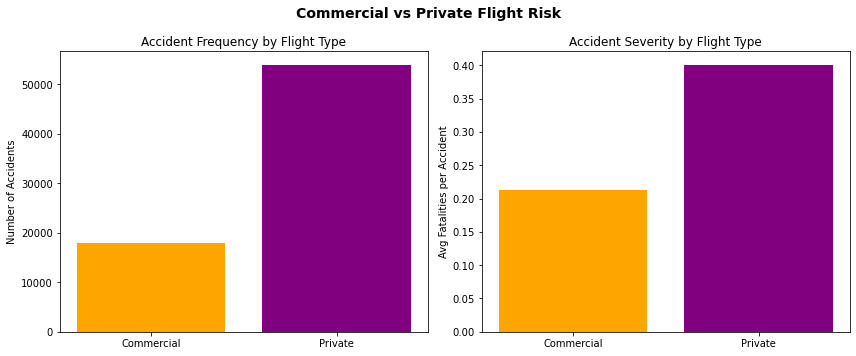

In [61]:
# --- Step 1: Categorize purpose of flight ---
def categorize_purpose(x):
    x = str(x).lower()
    if "personal" in x or "business" in x or "executive" in x:
        return "Private"
    elif any(term in x for term in [
        "instructional","aerial","ferry","banner","race","skydiving","external",
        "fire","drop","test"
    ]):
        return "Commercial"
    elif "public" in x:
        return "Government/Public"
    elif "unknown" in x:
        return "Unknown"
    else:
        return "Other"

df['purpose_category'] = df['purpose_of_flight'].apply(categorize_purpose)

# --- Step 2: Aggregate accidents and fatalities ---
purpose_group = df.groupby('purpose_category').agg(
    accident_count=('purpose_category','size'),
    total_fatalities=('total_fatal_injuries','sum')
).reset_index()

purpose_group['fatalities_per_accident'] = (
    purpose_group['total_fatalities'] / purpose_group['accident_count']
)

# --- Step 3: Focus on Commercial vs Private only ---
purpose_compare = purpose_group[
    purpose_group['purpose_category'].isin(['Commercial','Private'])
]

# --- Step 4: Plot side-by-side ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Left: Accident Frequency
axes[0].bar(purpose_compare['purpose_category'], purpose_compare['accident_count'],
            color=['orange','purple'])
axes[0].set_title('Accident Frequency by Flight Type')
axes[0].set_ylabel('Number of Accidents')

# Right: Accident Severity
axes[1].bar(purpose_compare['purpose_category'], purpose_compare['fatalities_per_accident'],
            color=['orange','purple'])
axes[1].set_title('Accident Severity by Flight Type')
axes[1].set_ylabel('Avg Fatalities per Accident')

plt.suptitle('Commercial vs Private Flight Risk', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


**Chart Interpretaion :** 

- In the Accident Frequency chart (left), private flights account for far more accidents compared to commercial flights.

- In the Accident Severity chart (right), private flights also show a higher average number of fatalities per accident, while commercial flights have fewer fatalities on average when an accident occurs.

**Answer :**

Both the frequency and severity perspectives indicate that **commercial flights are significantly safer than private flights.** 

Private aviation not only experiences more frequent accidents, but those accidents also tend to be more severe in terms of fatalities.

For the company’s investment decision, this strongly suggests that **entering the commercial aviation sector presents lower operational risk compared to private aviation.**

#### 4. Accidents Trends Over Time

**Question :** Is aviation safety improving or worsening over Time?

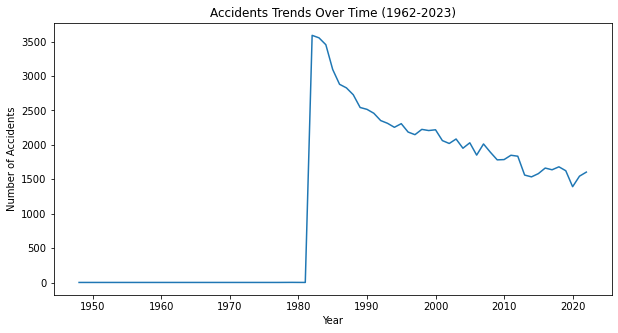

In [ ]:
# Count accidents per year
accidents_per_year = df['year'].value_counts().sort_index()

# Line plot
fig , ax = plt.subplots(figsize=(10,5))
ax.plot(accidents_per_year.index, accidents_per_year.values )

# Labels and title
ax.set_title('Accidents Trends Over Time (1962-2023)') 
ax.set_xlabel('Year')
ax.set_ylabel('Number of Accidents') 


plt.show()

**Chart Interpretaion :** 
- chart shows a sharp rise in recorded accidents starting around 1982.

- From the mid-1980s onward, there is a clear downward trend in the number of accidents.

- After ~2000, the numbers level off but still show a gradual decline.

**Answer :** 

The number of aviation accidents peaked in the early 1980s but has steadily declined since then (perharps reflecting improvements in technology, safety regulations, and pilot training). 
This indicates that **aviation safety has improved significantly over time.**

## 5. Conclusion

The analysis of aviation accident data provides clear insights into the safety performance of different **manufacturers, aircraft models, and flight purposes**.  

- **Safety has improved significantly over time**, with accidents declining steadily since the 1980s.  
- Certain manufacturers (e.g., **Grumman-Schweizer, Raven, Stinson**) and specific models (e.g., **Boeing 777, EMB-145LR, Boeing 757-232**) stand out as historically safe and low-risk.  
- **Commercial aviation consistently shows lower accident frequency and severity compared to private aviation**, indicating it is the safer sector for investment.  

Overall, the findings strongly suggest that the company should **prioritize commercial aviation operations** and focus on **selecting proven safe models from reliable manufacturers** to minimize risk.  

## 6. Recommendations

Based on the analysis, the following **actionable recommendations** are proposed:  

#### 1. Prioritize Commercial Aviation  
- Enter the commercial aviation sector first, as it shows a lower risk profile compared to private aviation (both in accident frequency and severity).  
- Position private aviation as a secondary or long-term expansion area once safety protocols are well established.  

#### 2. Select Aircraft from Safe Manufacturers and Models  
- Focus procurement on manufacturers such as **Grumman-Schweizer, Raven, and Stinson** that historically demonstrate low accident severity.  
- For commercial operations, prioritize safe, proven models like the **Boeing 777, EMB-145LR, and Boeing 757-232**, which show zero or negligible fatal accident records.  

#### 3. Leverage Safety as a Competitive Advantage  
- Highlight investment in historically safe aircraft as part of **marketing and brand positioning**.  
- This can help reassure customers, regulators, and insurers that the company prioritizes **passenger safety**.  


## 7. Next Steps  

To strengthen these findings and guide implementation, the following steps are recommended:  

#### 1. Operational Validation  
- Cross-check safety insights with **operational cost data** (fuel efficiency, maintenance costs, availability of spare parts).  
- Ensure selected aircraft are not only safe but also **financially viable**.  

#### 2. Regulatory and Regional Analysis  
- Investigate accident and safety trends specific to the **regions** where the company intends to operate.  
- Regulatory standards, weather patterns, and airport infrastructure may impact **model suitability**.  

#### 3. Insurance and Risk Modeling  
- Engage with insurers to assess **premiums and coverage differences** across manufacturers and models.  
- Build a comprehensive **risk model** combining accident data with **financial and operational factors**.  